<a href="https://colab.research.google.com/github/L-kiad/DO/blob/main/email_classification_spam_or_ham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# <p style="background-color:#562F5E;font-family:verdana;color:white;font-size:100%;text-align:center;letter-spacing:0.5px;padding: 10px"> IMPORTING LIBRARIES & DATASET </p>

In [2]:
!pip install optuna --q # For tuning hyperparameters

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 404.2/404.2 kB 6.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 225.3/225.3 kB 14.6 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 78.7/78.7 kB 7.5 MB/s eta 0:00:00


In [4]:
!pip install catboost lightgbm

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 98.6/98.6 MB 3.2 MB/s eta 0:00:00


In [5]:
import pandas as pd # Python library for data analysis and data frame
import numpy as np # Numerical Python library for linear algebra and computations
pd.set_option('display.max_columns', None) # code to display all columns

# Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# libraries for text processing and handling text data
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate

from collections import Counter

# all the required models
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# for model evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

# for hyperparameter tuning
import optuna

# to save the required files
import pickle

import warnings
warnings.filterwarnings('ignore') # To prevent kernel from showing any warning

In [6]:
# loading the dataset
df = pd.read_csv('/content/gdrive/MyDrive/mail_datasets/email_spam/completeSpamAssassin.csv')
df.head()

Unnamed: 0                                               Body  Label
0           0  \nSave up to 70% on Life Insurance.\nWhy Spend...      1
1           1  1) Fight The Risk of Cancer!\nhttp://www.adcli...      1
2           2  1) Fight The Risk of Cancer!\nhttp://www.adcli...      1
3           3  ##############################################...      1
4           4  I thought you might like these:\n1) Slim Down ...      1

# <p style="background-color:#562F5E;font-family:verdana;color:white;font-size:100%;text-align:center;letter-spacing:0.5px;padding: 10px"> INITIAL ANALYSIS </p>

In [7]:
#How big is data?
df.shape

(6046, 3)

In [8]:
# What is the data type of cols?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6046 entries, 0 to 6045
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6046 non-null   int64 
 1   Body        6045 non-null   object
 2   Label       6046 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 141.8+ KB


In [9]:
# Are there any missing values?
df.isnull().sum()

Unnamed: 0    0
Body          1
Label         0
dtype: int64

In [10]:
# Are there any duplicate values?
df.duplicated().sum()

0

<div style="color:white;
           display:fill;
           background-color:#562F5E;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Observations üëÄ</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
           1. Data contains 6046 rows and 3 columns <br>
           2. It has 1 string/object column, and one categorical column in int format <br>
           3. There's only 1 null value present <br>
           4. There are no duplicate values present within data <br>
    </div>

# <p style="background-color:#562F5E;font-family:verdana;color:white;font-size:100%;text-align:center;letter-spacing:0.5px;padding: 10px"> FEATURE ENGINEERING </p>

In [11]:
# dropping null values
df.dropna(inplace=True)

In [12]:
# dropping redudant column
df.drop(['Unnamed: 0'],axis=1, inplace=True)

**For the purpose of data exploration, I am creating new features:**

* no_char: Number of characters in the email
* no_words: Number of words in the text email
* no_sent: Number of sentences in the text email

In [ ]:
#Adding a column of numbers of charachters,words and sentences in each mail

df['no_char'] = df['Body'].apply(len)
df['no_words'] = df['Body'].apply(lambda x:len(nltk.word_tokenize(x)))
df['no_sent'] = df['Body'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

Body  Label  no_char  \
0  \nSave up to 70% on Life Insurance.\nWhy Spend...      1     1111   
1  1) Fight The Risk of Cancer!\nhttp://www.adcli...      1      753   
2  1) Fight The Risk of Cancer!\nhttp://www.adcli...      1      610   
3  ##############################################...      1     2863   
4  I thought you might like these:\n1) Slim Down ...      1      641   

   no_words  no_sent  
0       191       12  
1       139        5  
2       113        4  
3       690       35  
4       108        4

# <p style="background-color:#562F5E;font-family:verdana;color:white;font-size:100%;text-align:center;letter-spacing:0.5px;padding: 10px"> EDA - I </p>

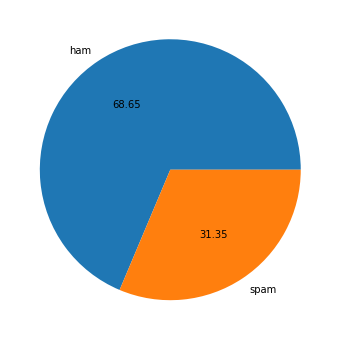

In [ ]:
# Let's see the distribution of target variable
plt.figure(figsize=(12,6))
plt.pie(df['Label'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
plt.show()

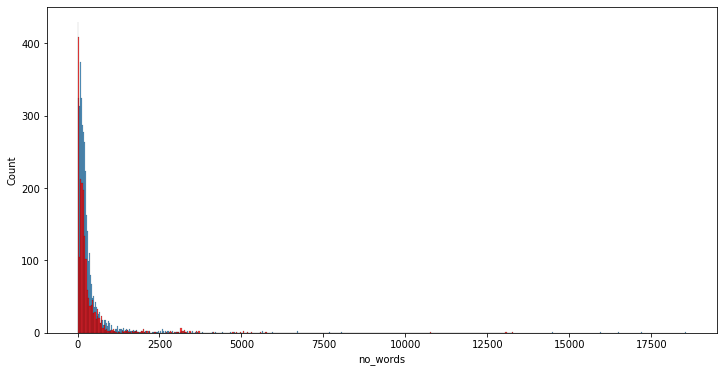

In [ ]:
# Lets see the distribution of number of words in spam and ham emails
plt.figure(figsize=(12,6))
sns.histplot(df[df['Label'] == 0]['no_words'])
sns.histplot(df[df['Label'] == 1]['no_words'], color='red')
plt.show()

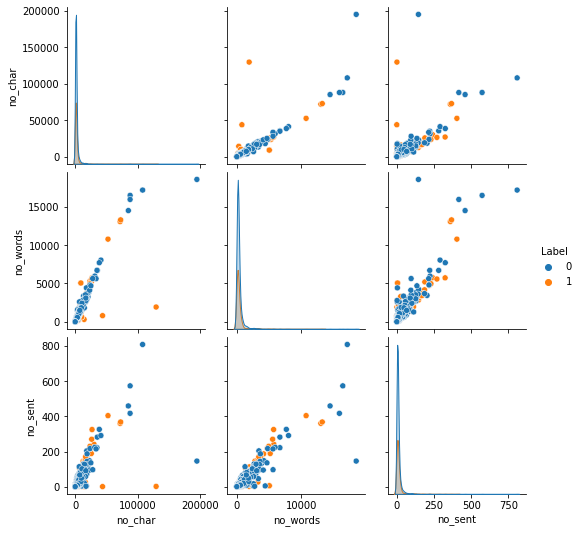

In [ ]:
sns.pairplot(df, hue='Label')
plt.show()

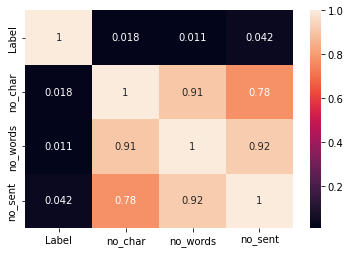

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.show()

# <p style="background-color:#562F5E;font-family:verdana;color:white;font-size:100%;text-align:center;letter-spacing:0.5px;padding: 10px"> TEXT PREPROCESSING </p>

Whenever we have textual data, we need to apply several pre-processing steps to the data to transform words into numerical features that work with machine learning algorithms. The pre-processing steps for a problem depend mainly on the domain and the problem itself, hence, we don‚Äôt need to apply all steps to every problem.

**for this problem I created a function which performs following steps:**
* Text Lowercase
* Word Tokenize
* Remove Special Characters
* Remove Stopwords
* Remove Punctuation
* Stemming

In [ ]:
def text_preprocessing(text):
    # convert  text to lowecase
    text = text.lower()

    # creating list of words in email
    text = nltk.word_tokenize(text)

    # removing special charecters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    # copying processed text to text and clearing y to store next steps output
    text = y[:]
    y.clear()

    # removing stopwords and punctuation marks
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    # stemming
    stemmer = SnowballStemmer('english')
    for i in text:
        y.append(stemmer.stem(i))

    return " ".join(y)

In [ ]:
# applying function to text
df['clean_text'] = df['Body'].apply(text_preprocessing)

# <p style="background-color:#562F5E;font-family:verdana;color:white;font-size:100%;text-align:center;letter-spacing:0.5px;padding: 10px"> EDA - II </p>

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

In [ ]:
# setting specs of word cloud image
wc = WordCloud(width=1000, height=500, min_font_size=10, background_color='black')

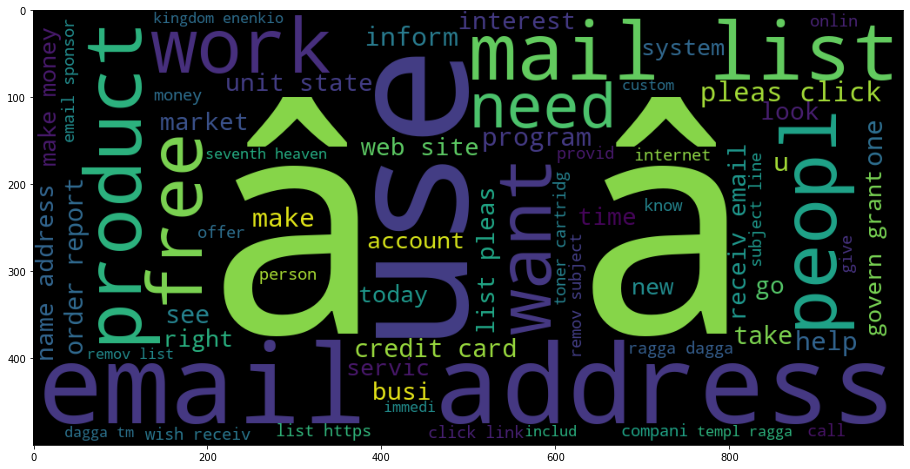

In [ ]:
# creating word cloud of spam emails
spam_wc = wc.generate(df[df['Label'] == 1]['clean_text'].str.cat(sep=' '))

plt.figure(figsize=(20,8))
plt.imshow(spam_wc)

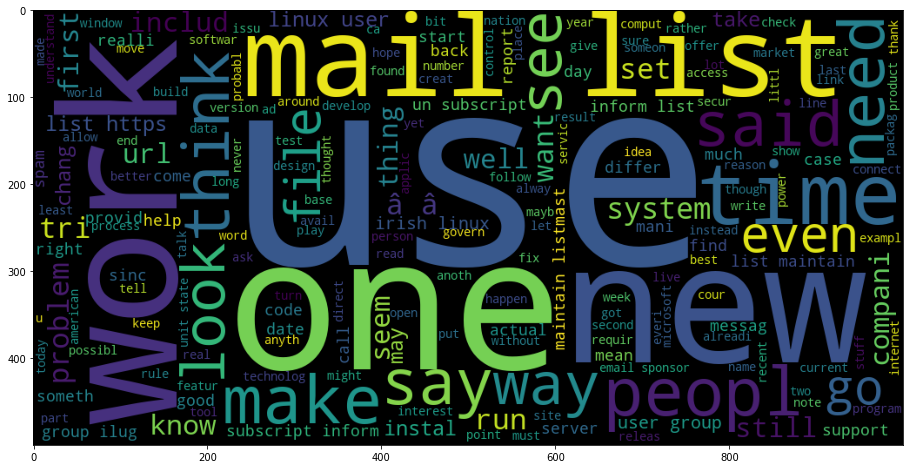

In [ ]:
# creating word cloud of ham emails
ham_wc = wc.generate(df[df['Label'] == 0]['clean_text'].str.cat(sep=' '))

plt.figure(figsize=(20,8))
plt.imshow(ham_wc)

In [ ]:
# creating list of all the words in processed spam emails
spam_corpus = []
for mail in df[df['Label'] == 1]['clean_text'].tolist():
    for word in mail.split():
        spam_corpus.append(word)

# number of words in all spam mails
len(spam_corpus)

276880

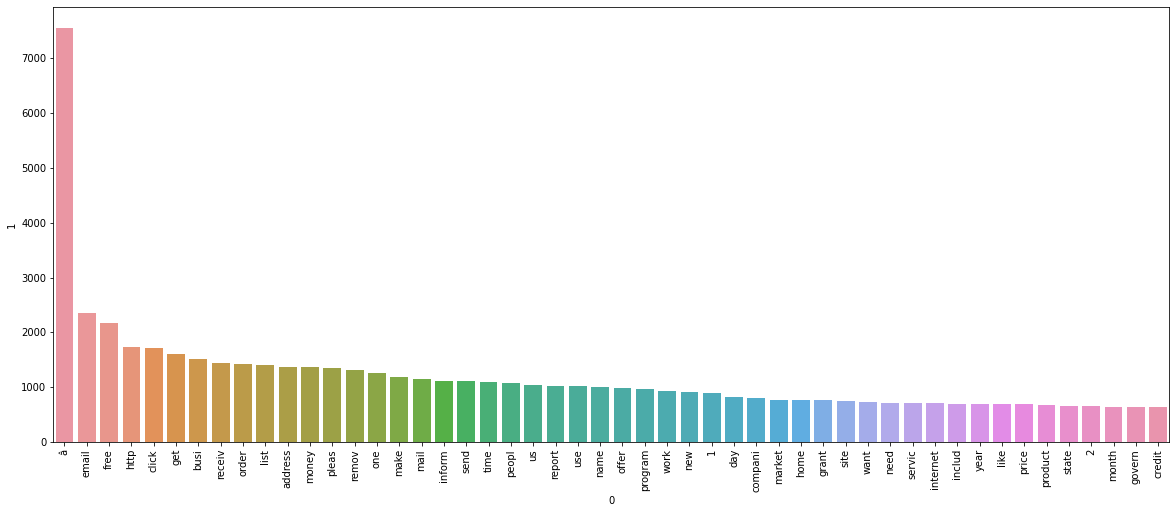

In [ ]:
# top 50 most occuring words in spam mails
plt.figure(figsize=(20,8))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(50))[0],pd.DataFrame(Counter(spam_corpus).most_common(50))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# creating list of all the words in processed ham emails
ham_corpus = []
for mail in df[df['Label'] == 0]['clean_text'].tolist():
    for word in mail.split():
        ham_corpus.append(word)

# number of words in all ham mails
len(ham_corpus)

547660

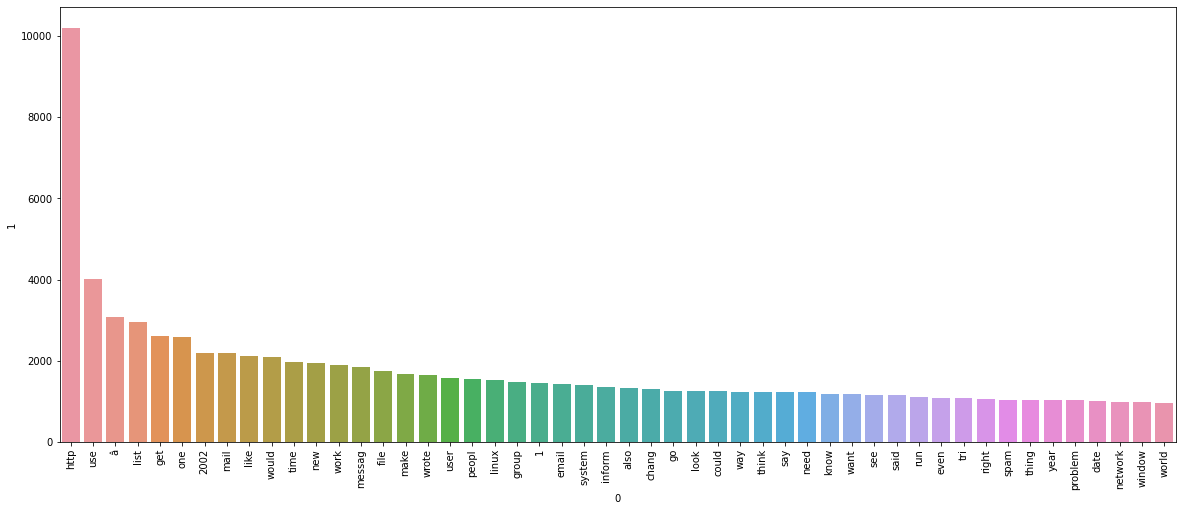

In [ ]:
# top 50 most occuring words in ham mails
plt.figure(figsize=(20,8))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(50))[0],pd.DataFrame(Counter(ham_corpus).most_common(50))[1])
plt.xticks(rotation='vertical')
plt.show()

# <p style="background-color:#562F5E;font-family:verdana;color:white;font-size:100%;text-align:center;letter-spacing:0.5px;padding: 10px"> TRAIN TEST SPLIT </p>

TF-IDF stands for Term Frequency Inverse Document Frequency of records. It can be defined as the calculation of how relevant a word in a series or corpus is to a text. The meaning increases proportionally to the number of times in the text a word appears but is compensated by the word frequency in the corpus (data-set).  

Tf-idf is one of the best metrics to determine how significant a term is to a text in a series or a corpus. tf-idf is a weighting system that assigns a weight to each word in a document based on its term frequency (tf) and the reciprocal document frequency (tf) (idf). The words with higher scores of weight are deemed to be more significant.

In [ ]:
#Changing text data in to numbers.

# tfidf = TfidfVectorizer()
tfidf = TfidfVectorizer(max_features=17000)

# Setting up features and target as x and y
x = tfidf.fit_transform(df['clean_text']).toarray()
y = df['Label'].values

In [ ]:
# Splitting the testing and training sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# <p style="background-color:#562F5E;font-family:verdana;color:white;font-size:100%;text-align:center;letter-spacing:0.5px;padding: 10px"> MODEL SELECTION </p>

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=0)
abc = AdaBoostClassifier(n_estimators=50, random_state=0)
bc = BaggingClassifier(n_estimators=50, random_state=0)
etc = ExtraTreesClassifier(n_estimators=50, random_state=0)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=0)
xgb = XGBClassifier(n_estimators=50,random_state=0)
sgd = SGDClassifier(random_state=0)
cat = CatBoostClassifier(verbose=0, random_state=0)
lgbm = LGBMClassifier(random_state=0)

In [ ]:
classifiers = {
    'GaussianNB' : gnb,
    'MultinomialNB' : mnb,
    'BernoulliNB' : bnb,
    'SVC' : svc,
    'KNeighbors' : knc,
    'DecisionTree': dtc,
    'LogisticRegression': lrc,
    'RandomForest': rfc,
    'AdaBoost': abc,
    'BaggingClassifier': bc,
    'ExtraTreesClassifier': etc,
    'GradientBoosting': gbdt,
    'XGB': xgb,
    'SGD' : sgd,
    'Catboost' : cat,
    'LGBM' : lgbm
}

In [ ]:
# creating a function to train list of algorithms and give accuracy , precision score
def train_classifier(classifiers,x_train,y_train,x_test,y_test):

    classifiers.fit(x_train,y_train)

    y_pred = classifiers.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [ ]:
# storing accuracy and precision in list
accuracy_scores = []
precision_scores = []

# training all the models on training data
for name,classifiers in classifiers.items():

    current_accuracy,current_precision = train_classifier(classifiers, x_train,y_train,x_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision,'\n')

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  GaussianNB
Accuracy -  0.9098428453267163
Precision -  0.8388746803069054 

For  MultinomialNB
Accuracy -  0.9371381306865177
Precision -  0.8983957219251337 

For  BernoulliNB
Accuracy -  0.9421009098428453
Precision -  0.9810126582278481 

For  SVC
Accuracy -  0.9578163771712159
Precision -  0.9007444168734491 

For  KNeighbors
Accuracy -  0.3945409429280397
Precision -  0.33815551537070526 

For  DecisionTree
Accuracy -  0.8866832092638545
Precision -  0.8 

For  LogisticRegression
Accuracy -  0.9338296112489661
Precision -  0.8828125 

For  RandomForest
Accuracy -  0.9396195202646815
Precision -  0.8790931989924433 

For  AdaBoost
Accuracy -  0.9305210918114144
Precision -  0.8536585365853658 

For  BaggingClassifier
Accuracy -  0.9354838709677419
Precision -  0.8592233009708737 

For  ExtraTreesClassifier
Accuracy -  0.9470636889991728
Precision -  0.8914141414141414 

For  GradientBoosting
Accuracy -  0.9189412737799835
Precision -  0.8729729729729729 

For  XGB
Accuracy -  

Data Frame of accuracy and precision of models trained on all features

In [ ]:
performance = pd.DataFrame({'Algorithm': classifier.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance

Algorithm  Accuracy  Precision
2            BernoulliNB  0.933830   0.977273
13                   SGD  0.960298   0.903465
3                    SVC  0.956989   0.900498
14              Catboost  0.945409   0.892857
1          MultinomialNB  0.904053   0.890909
10  ExtraTreesClassifier  0.945409   0.890863
6     LogisticRegression  0.934657   0.885117
12                   XGB  0.947064   0.883663
7           RandomForest  0.944582   0.877150
15                  LGBM  0.943755   0.876847
11      GradientBoosting  0.920596   0.875676
9      BaggingClassifier  0.928040   0.850856
8               AdaBoost  0.930521   0.845238
0             GaussianNB  0.905707   0.828283
5           DecisionTree  0.885856   0.799492
4             KNeighbors  0.385443   0.334825

Data Frame of accuracy and precision of models trained on max_features = 17000

In [ ]:
performance_maxf17k = pd.DataFrame({'Algorithm':classifier.keys(),'Accuracy_maxf17k':accuracy_scores,'Precision_maxf17k':precision_scores}).sort_values('Precision_maxf17k',ascending=False)
performance_maxf17k

Algorithm  Accuracy_maxf17k  Precision_maxf17k
2            BernoulliNB          0.942101           0.981013
13                   SGD          0.961125           0.903704
3                    SVC          0.957816           0.900744
1          MultinomialNB          0.937138           0.898396
14              Catboost          0.944582           0.892583
10  ExtraTreesClassifier          0.947064           0.891414
6     LogisticRegression          0.933830           0.882812
12                   XGB          0.944582           0.880893
15                  LGBM          0.945409           0.879310
7           RandomForest          0.939620           0.879093
11      GradientBoosting          0.918941           0.872973
9      BaggingClassifier          0.935484           0.859223
8               AdaBoost          0.930521           0.853659
0             GaussianNB          0.909843           0.838875
5           DecisionTree          0.886683           0.800000
4             KNeighbors          0.394541           0.338156

We can clearly see algorithm trained on 17000 features giving us the best result

**Best Performing Models:**
* BernoulliNB
* SGD
* SVC

# <p style="background-color:#562F5E;font-family:verdana;color:white;font-size:100%;text-align:center;letter-spacing:0.5px;padding: 10px"> HYPERPARAMETER TUNING </p>

* Parameters which define the model architecture are referred to as hyperparameters and thus this process of searching for the ideal model architecture is referred to as hyperparameter tuning.   
* hyperparameters are not model parameters and they cannot be directly trained from the data. Model parameters are learned during training when we optimize a loss function using something like gradient descent.  
* The model parameters specify how to transform the input data into the desired output, the hyperparameters define how our model is actually structured. Unfortunately, there's no way to calculate ‚Äúwhich way should I update my hyperparameter to reduce the loss?‚Äù (ie. gradients) in order to find the optimal model architecture; thus, we generally resort to experimentation to figure out what works best.

**Tunning Hyperparameters with Optuna:**  
Optuna is ‚Äúan open-source hyperparameter optimization framework to automate hyperparameter search.‚Äù The key features of Optuna include ‚Äúautomated search for optimal hyperparameters,‚Äù ‚Äúefficiently search large spaces and prune unpromising trials for faster results,‚Äù and ‚Äúparallelize hyperparameter searches over multiple threads or processes.‚Äù

**Tuning BernoulliNB**

The first step is to define the objective function for Optuna to maximize or minimize. The objective function should take a ‚ÄúTrial‚Äù object as the input and return the score, a float value or a list of float values.

In [ ]:
def objective_bnb(trial):
        alpha = trial.suggest_categorical('alpha', [0.7,0.8,0.9,1,1.1,1.2,1.3])
        binarize = trial.suggest_categorical('binarize', [0.0,0.1,0.2,0.3])

        bnb = BernoulliNB(
                                        alpha=alpha,
                                        binarize=binarize
        )
        return cross_val_score(bnb, x_train, y_train, n_jobs=-1, verbose=0, scoring='precision').mean()

The next step is to use the objective function to create a ‚ÄúStudy‚Äù object and then optimize it.

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective_bnb, n_trials=10)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2022-10-21 04:30:15,167] A new study created in memory with name: no-name-5626dc5c-7dad-48e2-8004-a382ffde97dc
[I 2022-10-21 04:30:21,902] Trial 0 finished with value: 0.9677965467546056 and parameters: {'alpha': 1.3, 'binarize': 0.1}. Best is trial 0 with value: 0.9677965467546056.
[I 2022-10-21 04:30:27,205] Trial 1 finished with value: 0.9859479448158156 and parameters: {'alpha': 1.2, 'binarize': 0.2}. Best is trial 1 with value: 0.9859479448158156.
[I 2022-10-21 04:30:32,432] Trial 2 finished with value: 0.9427825658428641 and parameters: {'alpha': 0.7, 'binarize': 0.2}. Best is trial 1 with value: 0.9859479448158156.
[I 2022-10-21 04:30:37,645] Trial 3 finished with value: 0.9796390356842755 and parameters: {'alpha': 0.9, 'binarize': 0.0}. Best is trial 1 with value: 0.9859479448158156.
[I 2022-10-21 04:30:42,732] Trial 4 finished with value: 0.9549944659058909 and parameters: {'alpha': 0.8, 'binarize': 0.2}. Best is trial 1 with value: 0.9859479448158156.
[I 2022-10-21 04:30:4

Accuracy: 1.0
Best hyperparameters: {'alpha': 0.9, 'binarize': 0.3}


In [ ]:
bnb = BernoulliNB(alpha=0.9, binarize=0.3)
bnb.fit(x_train,y_train)

bnb_pred = bnb.predict(x_test)
print('Accuracy:',accuracy_score(y_test,bnb_pred))
print('Precision:',precision_score(y_test,bnb_pred))

Accuracy: 0.7270471464019851
Precision: 1.0


we have succefully increased the precision but the accuracy has reduced. I experimented a lot and got to see that one of the score is decreasing if i try to increase other. So i won't be tuning this model cause its giving me better result that way

**Tuning SGDClassifier:**

In [ ]:
def objective_sgd(trial):
        loss = trial.suggest_categorical('loss', ['hinge','log_loss','log','modified_huber','squared_hinge','perceptron'])
        penalty = trial.suggest_categorical('penalty', ['l2','l1','elasticnet'])
        l1_ratio = trial.suggest_categorical('l1_ratio', [0.2,0.5,0.8])
        max_iter = trial.suggest_categorical('max_iter', [100,500,1000])


        sgd = SGDClassifier(
                            early_stopping=True,
                            random_state=0,
                            loss=loss,
                            penalty=penalty,
                            l1_ratio=l1_ratio,
                            max_iter=max_iter
        )
        return cross_val_score(sgd, x_train, y_train, n_jobs=-1, verbose=0, scoring='precision').mean()

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective_sgd, n_trials=20)

trial_sgd = study.best_trial

print('Accuracy: {}'.format(trial_sgd.value))
print("Best hyperparameters: {}".format(trial_sgd.params))

[I 2022-10-21 04:35:00,501] A new study created in memory with name: no-name-08caade9-f463-4630-bc84-67fc8dfbbff8
[I 2022-10-21 04:35:14,772] Trial 0 finished with value: 0.9317323084780229 and parameters: {'loss': 'squared_hinge', 'penalty': 'l1', 'l1_ratio': 0.8, 'max_iter': 500}. Best is trial 0 with value: 0.9317323084780229.
[I 2022-10-21 04:35:27,455] Trial 1 finished with value: 0.8976613364655718 and parameters: {'loss': 'log', 'penalty': 'l1', 'l1_ratio': 0.8, 'max_iter': 500}. Best is trial 0 with value: 0.9317323084780229.
[I 2022-10-21 04:35:36,706] Trial 2 finished with value: 0.9076097990647654 and parameters: {'loss': 'log', 'penalty': 'l2', 'l1_ratio': 0.5, 'max_iter': 500}. Best is trial 0 with value: 0.9317323084780229.
[I 2022-10-21 04:35:43,535] Trial 3 finished with value: 0.9434031560520972 and parameters: {'loss': 'squared_hinge', 'penalty': 'l2', 'l1_ratio': 0.2, 'max_iter': 500}. Best is trial 3 with value: 0.9434031560520972.
[I 2022-10-21 04:35:54,906] Trial 

Accuracy: 0.9981322652270451
Best hyperparameters: {'loss': 'perceptron', 'penalty': 'l2', 'l1_ratio': 0.5, 'max_iter': 1000}


In [ ]:
sgd = SGDClassifier(loss='perceptron',penalty='l2',l1_ratio=0.5,max_iter=1000)
sgd.fit(x_train,y_train)

sgd_pred = sgd.predict(x_test)
print('Accuracy:',accuracy_score(y_test,sgd_pred))
print('Precision:',precision_score(y_test,sgd_pred))

Accuracy: 0.946236559139785
Precision: 0.9904761904761905


we have increased the precision and accuracy is also looking good.

I am giving more importance to precision cause , precision means number of ham emails classified as spam and accuracy means number of correctly classified emails.  

I am okay with few spam emails not classified as spam, but i don't want any ham email classified as spam cuase it might be very important. So thats why i wanted precision very high as well as accuracy

<h2 style="background-color:#562F5E;font-family:verdana;color:white;font-size:200%;text-align:center;letter-spacing:0.5px;padding: 10px"> If You Liked The NoteBook, Please Upvote‚úå  </h2>